In [1]:
# Preamble

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Econ 381 Final - Part 1 Take Home

This test has an overarching assessment objective: can my students conduct quantitative macroeconomic experiments in Python? You will be asked to perform said experiments in the context of three models: Solow-Romer, AD-AS, and DGE. You will find the basic code for each model below. 

Your tasks are:

1. Modify the code as needed
2. Conduct the quantitative experiment
3. Illustrate the results with the graphs that make the most sense given the question
4. Analyze your findings in markdown. 

Markdown allows for LaTex mathematical notation, [HERE](https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index) is a link in case you want to use it (not required). Anything in math notation has to be delimited with dollar signs. Below you will find an example. Double click on this Markdown box to see how to write it in code.

- A simple equation $y=mx+b$
- A less equation with subscripts and superscripts $y=mx^{2}+b_{i}$
- An accented variable $\bar{a}$
- A fraction $\frac{x}{y}$
- Calculus notation $\frac{df(x)}{dx}$, $\frac{\partial f(x,y)}{\partial x}$

[HERE](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) is a short guide on how to use Markdown formatting. I've used some of it on this Markdown box if you want an example.



## Part 1: Solow-Romer

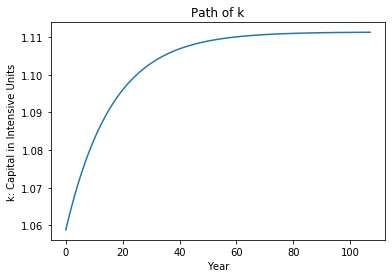

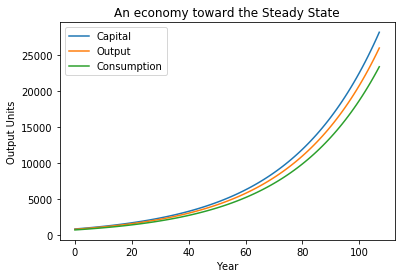

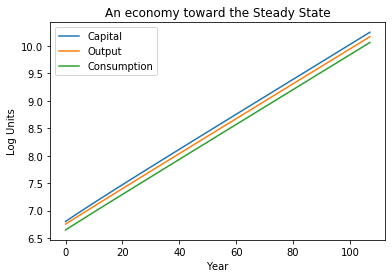

In [4]:
## Parameter Values
l = 0.01
z = 0.02/l
n = 0.012
s = 0.1
delta = 0.06
alpha = 0.33

## Define functions
# 1) Steady state of capital in intensive units

kstar = lambda s, delta, z, l, n, alpha: ((s/(delta + z*l + n)) ** (1/ (1-alpha))) * (1-l)



# 2) Output function

output=lambda K,L,A,alpha,l: K ** alpha * (A* L) ** (1-alpha) * (1-l)

## Definiting intial values for the path of Capital, Labor, and TFP.

K0 = 900
L0 = 500 
A0 = 1.7 

##Preallocating arrays

L = np.array([L0])
A = np.array([A0])
K = np.array([K0])
Y = np.array([output(K[0],L[0],A[0],alpha,l)])
C = np.array([(1-s)*Y])
t = np.array([0])
Delta_K= np.array([0])
k = np.array([K[0]/(A[0]*L[0])]) #Capital in intensive units k=K/AL
k_ss = kstar(s, delta, z, l, n, alpha)


## Loop parameters

i = 0 #Start counter
epsilon=0.01 # while loop tolerance

## The first loop simulates an economy reaching the steady state. The second loop extends the simulation for 10 periods
## after the steady state has been reached.


while (abs(k[i] - k_ss)) >epsilon:
    i += 1    
    t = np.append(t, i) #Time vector
    L = np.append(L, L[i-1] * (1 + n)) #Labor Supply Path
    A = np.append(A, A[i-1] * (1 + z*l)) #TFP Path
    Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1]) #Change in capital stock
    K= np.append(K,K[i-1] + Delta_K[i]) #Capital Stock Path
    k = np.append(k,K[i] / (A[i] * L[i])) #Path of Capital in intensive units
    Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
    C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))

for i in range (i, i+10):
    i += 1    
    t = np.append(t, i)
    L = np.append(L, L[i-1] * (1 + n))
    A = np.append(A, A[i-1] * (1 + z*l))
    Delta_K = np.append(Delta_K,s * output(K[i-1],L[i-1],A[i-1],alpha,l) - delta * K[i-1])
    K = np.append(K,K[i-1] + Delta_K[i])
    k = np.append(k,K[i-1] / (A[i-1] * L[i-1]))
    Y = np.append(Y, output(K[i],L[i],A[i],alpha,l))
    C = np.append(C, (1-s) * output(K[i],L[i],A[i],alpha,l))
    

## Paths of Capital in intensive units, Capital, Output, and Consumption

plt.plot(t,k)
plt.xlabel('Year')
plt.ylabel('k: Capital in Intensive Units')
plt.title('Path of k')
plt.show()

plt.plot(t,K, label='Capital')
plt.plot(t,Y, label='Output')
plt.plot(t,C, label='Consumption')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('An economy toward the Steady State')
plt.legend()
plt.show()

plt.plot(t,np.log(K), label='Capital')
plt.plot(t,np.log(Y), label='Output')
plt.plot(t,np.log(C), label='Consumption')
plt.xlabel('Year')
plt.ylabel('Log Units')
plt.title('An economy toward the Steady State')
plt.legend()
plt.show()

### Venezuela
War destroys an economy, but so does civil unrest and government mismanagement. Venezuela falls into the second category, but looking at the aggregate time series you couldn't really tell they were not in the middle of war. Since 2002 around 3.5 million Venezuelans immigrated from their country. Since 2013 GDP per capital has halved, and the capital stock has started to be depleted (negative growth). You can see the series for yourselves here: [Net Migration](https://fred.stlouisfed.org/series/SMPOPNETMVEN), [GDP per Capita](https://fred.stlouisfed.org/series/NYGDPPCAPKDVEN), and [Change in the Capital Stock](https://fred.stlouisfed.org/series/RKNANPVEA666NRUG).

#### Please model what is happening in Venezuela using the Solow-Romer model.

a) Please describe the path of the economy after the events you simulated.

b) How long will it take for the economy to reach the steady state? 

c) What are the welfare consequences of national unrest?



## Part 2: AD-AS

In [ ]:
## Parameter Values paths

t = 20 # Each period is a quarter.
a = np.zeros(t) 
b = np.ones(t)/2
m = np.ones(t)
v = np.ones(t)/2
pi_bar = np.ones(t)*0.74 # Quarterly Inflation rate target - equivalent to 3% per year.
o = np.zeros(t)


# Preallocate loop variables

pi = np.zeros(t)
sr_y = np.zeros(t)

# Initial, steady state values for inflation and short run output

pi[0] = (pi_bar[0] + o[0] + (v[0]*b[0]*m[0])*pi_bar[0] + a[0]*v[0])/(1 + v[0]*b[0]*m[0])
sr_y[0] = a[0] -(b[0]*m[0])/(1 + v[0]*b[0]*m[0])*(pi[0] - pi_bar[0] + o[0] + a[0]*v[0])



# Sample: One period shock in period 1; increase in government expenditures of 15% of GDP.

a[1:2] = 15  

for i in range(1,t):
    
    pi[i] = (pi[i-1] + o[i] + (v[i]*b[i]*m[i])*pi_bar[i] + a[i]*v[i])/(1 + v[i]*b[i]*m[i])
    sr_y[i] = a[i] -(b[i]*m[i])/(1 + v[i]*b[i]*m[i])*(pi[i] - pi_bar[i] + o[i] + a[i]*v[i])
    
    
## Impulse response function for inflation and short run output.

time = np.linspace(0,t-1,t)

plt.plot(time, pi , label = 'Inflation')
plt.plot(time, sr_y, label = 'Short-run Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Inpulse response functions: Inflation and Short-run Output')
plt.xlim(0, time.size) 
plt.legend()
plt.show()
plt.show()

In [ ]:
## Simulate the path of an economy starting in a balanced growth path, P[0]=100, and Y[0]=100

# Setting up the variable paths

n = 5   # number of periods preceeding the shock
y_growth_rate = 0.004 #Output growth rate, quarterly 
p_bar_before = 0.0074 #Economy inflation rate, quarterly
p = np.zeros(t+n)
y = np.zeros(t+n)

# Initial values for the series

y[0] = 100
p[0] = 100

# The economy before the shock

for i in range(1,n):
    y[i]=y[i-1]*(1+y_growth_rate)
    p[i] = p[i-1]*(1 + p_bar_before)

    
# The economy after the shock.

for i in range(n-1,t+n):
    y[i] = y[i-1]*(1 + y_growth_rate + sr_y[i-n]/100)
    p[i] = p[i-1]*(1 + pi[i-n]/100)
    

    
## The path of output and prices over time    
    
    
time2 = np.linspace(0,t+n-1,t+n)

plt.plot(time2, p , label = 'Price Level')
plt.plot(time2, y, label = 'Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Time Paths of the Price Level and Output')
plt.xlim(0, time2.size-1) 
plt.legend()
plt.show()


plt.plot(time2, p , label = 'Price Level')
plt.plot(time2, y, label = 'Output')
plt.xlabel('Quarter')
plt.title('AD-AS Model - Time Paths of the Price Level and Output')
plt.xlim(0, time2.size-1) 
plt.legend()
plt.yscale('log')
plt.show()

### First quarter 2020 in the US

Four major events without precedent have taken place during the first quarter in 2020. The Federal Reserve has intervened in the economy with everything they have, and then some (click [HERE](https://www.wsj.com/articles/the-fed-transformed-jay-powell-leads-central-bank-into-uncharted-waters-11585596210)). Congress has moved to provide three stimulus package with a fourth on the way (click [HERE](https://www.wsj.com/articles/after-three-coronavirus-stimulus-packages-congress-is-already-prepping-phase-four-11585483203)). Oil markets have seen more volatility than in the 1980's (click [HERE](https://www.wsj.com/articles/oil-leaps-on-hopes-for-u-s-action-end-to-saudi-russia-spat-11585821756?mod=searchresults&page=1&pos=5)). Lastly, Covid-19 and the accompanying measures to contain it have hit households and firms hard. 

#### Model the events hitting the US economy using the AD-AS framework.

a) How do the events previously describe translate to parameter values in the AD-AS model? Justify your choices.

b) Analyze the path of the economy over time as it responds to the changes you made in part a). 

c) How long will it take for the economy to get back to potential output?

d) Assuming that the natural rate of unemployment is 5%, use Okun's law (Jones, p.248) to create an impulse response function (like the first graph) for cyclical unemployment. What is the highest unemployment rate the US could reach according to you? What does that mean for you as a future college graduate?

## Part 3: DGE

In [ ]:
#Parameter values

t = 15
alpha=1/3
beta= 0.98
delta=0.04

# Steady State Values

w_bar = lambda alpha, beta: (1-alpha) ** (1/(1-alpha)) * (beta/(1+beta)) ** (alpha/(1-alpha))
r_bar = lambda alpha, beta: (1+beta)/beta * alpha/(1-alpha)

# Initial Values for interest rate and wage vectors

r_0=r_bar(alpha,beta)
w_0=w_bar(alpha,beta)

# Functions

output = lambda K,L,alpha: K ** alpha * (L) ** (1-alpha)
wage_pres = lambda wage_past, alpha, beta: (1-alpha) * (beta/(1+beta) * wage_past) ** alpha 
int_pres = lambda wage_past, alpha, beta: alpha / ((beta/(1+beta) * wage_past) ** (1-alpha))


#Preallocating arrays and initial values.

w = np.array([w_0])
r = np.array([r_0])

c_1 = np.array ([w_0/(1+beta)])
c_2 = np.array([(1+r_0-delta)*beta/(1+beta)*w_0])
k_2 = np.array([beta/(1+beta)*w_0])
K = k_2
Y = output(K,1,alpha)

alpha= np.ones(t) * alpha 
beta = np.ones(t) * beta 
delta = np.ones(t) * delta 

# Sample shock, permanent decrease in the discount rate at period 8

beta[8:15] = 0.98/2



i = 0 #Start counter

for i in range(0,t-1):
    i += 1
    w = np.append(w, wage_pres(w[i-1],alpha[i],beta[i])) #Path of wages
    r = np.append(r, int_pres(w[i-1],alpha[i],beta[i])) #Path of interest rate
    k_2 = np.append(k_2,[beta[i]/(1+beta[i])*w[i-1]])
    c_1 = np.append(c_1,[w[i]/(1+beta[i])])
    c_2 = np.append(c_2,[(1+r[i]-delta[i])*beta[i]/(1+beta[i])*w[i]])
    Y = np.append(Y,output(k_2[i],1,alpha[i]))    
    

time=np.linspace(0,t-1,t)

plt.plot(time,w, label='Wages')
plt.plot(time,r, label='Interest Rate')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of prices across time')
plt.legend()
plt.show()

plt.plot(time,k_2, label='Capital')
plt.plot(time,np.ones(t), label='Labor')
plt.plot(time,Y, label='Output')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of the economy across time')
plt.legend()
plt.show()

plt.plot(time,c_1, label='Consumption when Young')
plt.plot(time,c_2, label='Consumption when Old')
plt.xlabel('Year')
plt.ylabel('Output Units')
plt.title('The path of household consumption')
plt.legend()
plt.show()


### Fundamental Changes to the Economy

The Covid-19 emergency will have repercussions on households and firms fundamentals. Many households found themselves without an emergency fund to draw upon. At the same time there is a push to increase the power of workers in the US corporate system. These two pressures will likely lead to an increase in savings and the share of income that is accrued by households.

#### Model the fundamental changes in the economy using the DGE model.

a) How do the events previously describe translate to parameter values in the DGE model? Justify your choices.

b) Analyze the path of the economy over time as it responds to the changes you made in part a). 

c) Assume the changes in the parameters of the model only affect one generation. How many generations will live with the decisions of their predecesors?

d) The DGE model we've worked with is only the most basic model of this type. Suggest one possible extension to the model and explain how that extension might change your results from part a) and b)
